In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xs = np.loadtxt("old_faithful.txt")

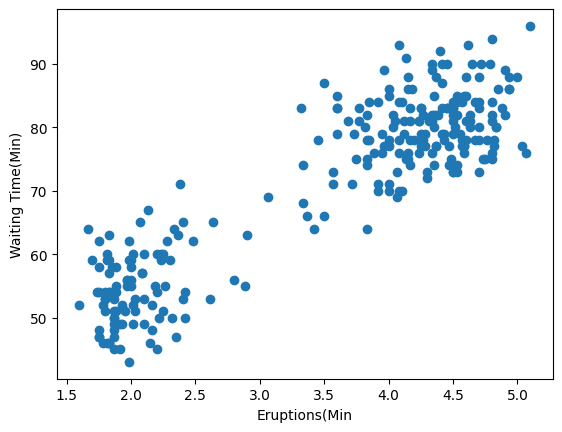

In [6]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel("Eruptions(Min")
plt.ylabel("Waiting Time(Min)")
plt.show()

In [2]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
# 2つの正規分布の混合比率
phis = np.array([0.35, 0.65])

def sample():
    # zは0か1のどちらかをphisの確率で選ぶ
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    return np.random.multivariate_normal(mu, cov)

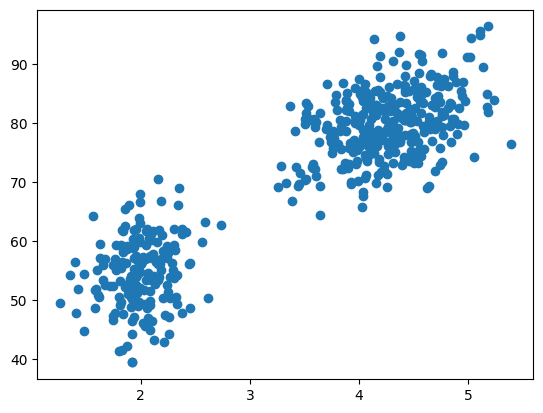

In [4]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()
    
plt.scatter(xs[:, 0], xs[:, 1])
plt.show()